# DD2358 Final Project: Artifical Neural Network in Python
 Group 17: Felix Schätzle, Georgios Mitsos, Thorben Fetz

The code we used as a starting point is located in a [GitHub repository](https://github.com/pmocz/artificialneuralnetwork-python/blob/main/artificialneuralnetwork.py). It trains and evaluates a three-layer neural network on the task of classifying images of galaxies into three categories. 


In [20]:
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


The code is timed for different numbers of iterations in order to benchmark its running time and understand the relation between number of iterations and computational time. The running time is presented in seconds. The laptop used is a 2022 MacBook Air M2 16 GB RAM.


| Number of iterations | Run No 1 | Run No 2 | Run No 3 | Run No 4 | Run No 5 | Average | Standard Deviation
| --- | --- | --- | --- | --- | --- | --- | --- | 
| 10 | 8.0 | 6.7 | 8.1 | 6.6 | 8.7 | 7.6 | 0.9 |
| 20 | 16.5 | 14.7 | 13.4 | 12.8 | 13.7 | 14.2 | 1.4 |
| 30 | 19.8 | 18.7 | 19.2 | 18.6 | 19.6 | 19.2 | 0.5 |
| 50 | 32.9 | 31.4 | 32.4 | 29.8 | 30.5 | 31.4 | 1.3 |
| 80 | 49.7 | 47.8 | 52.5 | 49.6 | 48.2 | 49.6 | 1.8 |
| 100 | 62.1 | 57.1 | 57.4 | 58.0 | 58.9 | 58.7 | 2.0|


In [11]:
def linear_fit(x, a, b):
    return a * x + b


In [44]:
xdata = np.array([10,20,30,50,80,100])
ydata = np.array([7.6,14.2,19.2,31.4,49.6,58.7])

popt, pcov = curve_fit(linear_fit, xdata, ydata)

print(f'Our data are approximated by f(x) = {popt[0]}*x + {popt[1]}.')


Our data are approximated by f(x) = 0.5745623342165787*x + 2.3461538461567804.


So the computational time is a sum of a value proportional to the number of iterations and a constant overhead (2.3 sec).


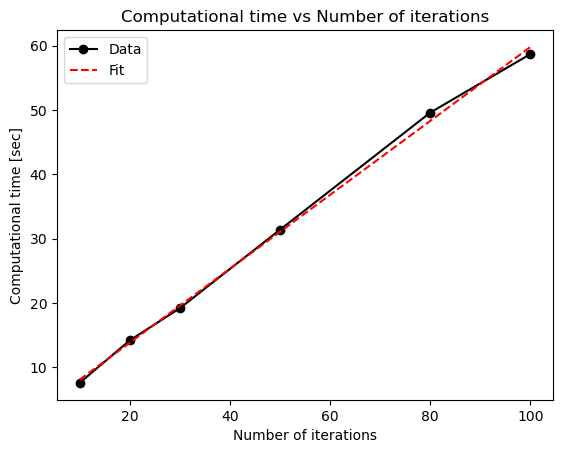

In [38]:
plt.plot([10,20,30,50,80,100], [7.6,14.2,19.2,31.4,49.6,58.7], 'k-o', label = 'Data')
plt.plot(xdata, linear_fit(xdata, *popt), 'r--', label = 'Fit')
plt.xlabel("Number of iterations")
plt.ylabel("Computational time [sec]")
plt.title("Computational time vs Number of iterations")
plt.legend()


It is observed that the relation between computational time and number of iterations is approximately linear. In that way we can extrapolate and find the computational time for higher numbers of iterations.


### cProfiling for 60 iterations

In [17]:
%run -m cProfile -o profiling/artificialneuralnetwork.stats -s cumulative artificialneuralnetwork.py


initial cost function J = 2.0368341799643392
initial accuracy on training set = 0.3333333333333333
iter=  1:  Jtrain= 1.9494 acc= 33.33%  |  Jtest= 2.0102 acc= 33.33%
iter=  2:  Jtrain= 1.9412 acc= 33.33%  |  Jtest= 2.0019 acc= 33.33%
iter=  3:  Jtrain= 1.9312 acc= 33.33%  |  Jtest= 1.9918 acc= 33.33%
iter=  4:  Jtrain= 1.9303 acc= 33.41%  |  Jtest= 1.9908 acc= 33.19%
iter=  5:  Jtrain= 1.9302 acc= 37.44%  |  Jtest= 1.9907 acc= 39.85%
iter=  6:  Jtrain= 1.9301 acc= 33.30%  |  Jtest= 1.9906 acc= 37.19%
iter=  7:  Jtrain= 1.9299 acc= 33.33%  |  Jtest= 1.9899 acc= 33.33%
iter=  8:  Jtrain= 1.9291 acc= 33.33%  |  Jtest= 1.9874 acc= 33.33%
iter=  9:  Jtrain= 1.9277 acc= 33.26%  |  Jtest= 1.9843 acc= 33.33%
iter= 10:  Jtrain= 1.9267 acc= 33.15%  |  Jtest= 1.9815 acc= 33.19%
iter= 11:  Jtrain= 1.9264 acc= 35.70%  |  Jtest= 1.9806 acc= 34.81%
iter= 12:  Jtrain= 1.9246 acc= 34.22%  |  Jtest= 1.9771 acc= 33.19%
iter= 13:  Jtrain= 1.9236 acc= 32.30%  |  Jtest= 1.9753 acc= 32.44%
iter= 14:  Jtrain

![inital cProfile result](profiling/cProfile_initial.png)

### Memory profiling for 6 iterations

In [3]:
%run -m memory_profiler artificialneuralnetwork.py


initial cost function J = 2.0368341799643392
initial accuracy on training set = 0.3333333333333333
iter=  1:  Jtrain= 1.9494 acc= 33.33%  |  Jtest= 2.0102 acc= 33.33%
iter=  2:  Jtrain= 1.9412 acc= 33.33%  |  Jtest= 2.0019 acc= 33.33%
iter=  3:  Jtrain= 1.9312 acc= 33.33%  |  Jtest= 1.9918 acc= 33.33%
iter=  4:  Jtrain= 1.9303 acc= 33.41%  |  Jtest= 1.9908 acc= 33.19%
iter=  5:  Jtrain= 1.9302 acc= 37.44%  |  Jtest= 1.9907 acc= 39.85%
iter=  6:  Jtrain= 1.9301 acc= 33.30%  |  Jtest= 1.9906 acc= 37.19%
iter=  7:  Jtrain= 1.9299 acc= 33.33%  |  Jtest= 1.9899 acc= 33.33%
iter=  8:  Jtrain= 1.9291 acc= 33.33%  |  Jtest= 1.9874 acc= 33.33%
iter=  9:  Jtrain= 1.9277 acc= 33.26%  |  Jtest= 1.9843 acc= 33.33%
iter= 10:  Jtrain= 1.9267 acc= 33.15%  |  Jtest= 1.9815 acc= 33.19%
iter= 11:  Jtrain= 1.9264 acc= 35.70%  |  Jtest= 1.9806 acc= 34.81%
iter= 12:  Jtrain= 1.9246 acc= 34.22%  |  Jtest= 1.9771 acc= 33.19%
iter= 13:  Jtrain= 1.9236 acc= 32.30%  |  Jtest= 1.9753 acc= 32.44%
iter= 14:  Jtrain

In [5]:
%run -m mprof run --output profiling/mprofile_neural.dat artificialneuralnetwork.py


mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


/Users/georgiosmitsos/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1697: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, **opts)


initial cost function J = 2.0368341799643392
initial accuracy on training set = 0.3333333333333333
iter=  1:  Jtrain= 1.9494 acc= 33.33%  |  Jtest= 2.0102 acc= 33.33%
iter=  2:  Jtrain= 1.9412 acc= 33.33%  |  Jtest= 2.0019 acc= 33.33%
iter=  3:  Jtrain= 1.9312 acc= 33.33%  |  Jtest= 1.9918 acc= 33.33%
iter=  4:  Jtrain= 1.9303 acc= 33.41%  |  Jtest= 1.9908 acc= 33.19%
iter=  5:  Jtrain= 1.9302 acc= 37.44%  |  Jtest= 1.9907 acc= 39.85%
iter=  6:  Jtrain= 1.9301 acc= 33.30%  |  Jtest= 1.9906 acc= 37.19%
iter=  7:  Jtrain= 1.9299 acc= 33.33%  |  Jtest= 1.9899 acc= 33.33%
iter=  8:  Jtrain= 1.9291 acc= 33.33%  |  Jtest= 1.9874 acc= 33.33%
iter=  9:  Jtrain= 1.9277 acc= 33.26%  |  Jtest= 1.9843 acc= 33.33%
iter= 10:  Jtrain= 1.9267 acc= 33.15%  |  Jtest= 1.9815 acc= 33.19%
iter= 11:  Jtrain= 1.9264 acc= 35.70%  |  Jtest= 1.9806 acc= 34.81%
iter= 12:  Jtrain= 1.9246 acc= 34.22%  |  Jtest= 1.9771 acc= 33.19%
iter= 13:  Jtrain= 1.9236 acc= 32.30%  |  Jtest= 1.9753 acc= 32.44%
iter= 14:  Jtrain

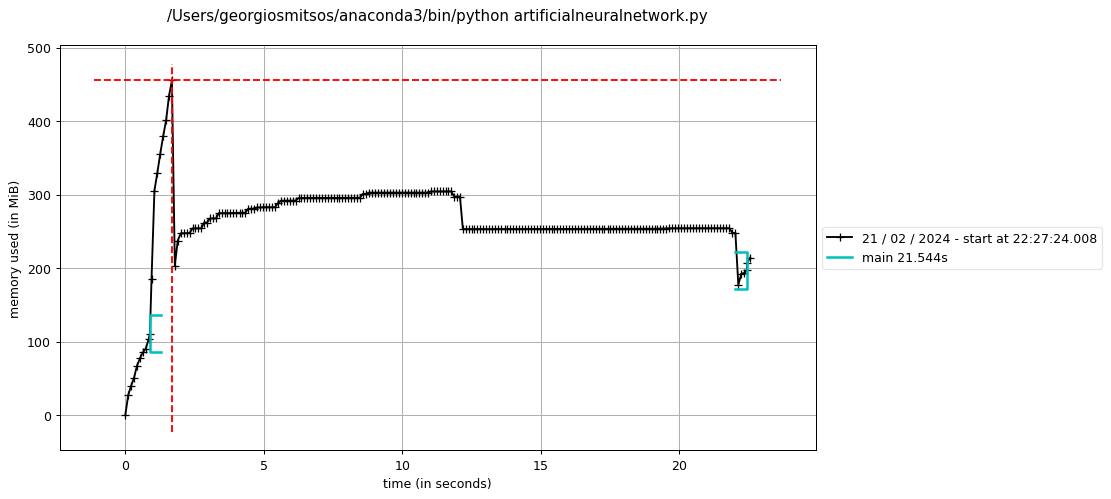

In [6]:
%run -m mprof plot profiling/mprofile_neural.dat
